In [15]:
# =====================================
# 1. PROJECT SETUP & DATA LOADING
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully!")

# Path to your CSV file (update here)
DATA_PATH = "movies.csv"  # Change to your file path
df = pd.read_csv(DATA_PATH)

print("Dataset shape:", df.shape)
df.head()


Libraries loaded successfully!
Dataset shape: (10178, 12)


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [16]:
# =====================================
# 2. DATA OVERVIEW
# =====================================

df.info()    # data types + missing values
df.describe()  # summary of numerical columns
df.isnull().sum()  # number of missing values per column
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB
              score      budget_x       revenue
count  10178.000000  1.017800e+04  1.017800e+04
mean      63.497052  6.488238e+07  2.531401e+08
std       13.537012  5.707565e+07  2.777880e+08
min        0.000000  1.000000e+00  0.000000e+00
25%       59.000000  1.

In [17]:
# =====================================
# 3. DATA CLEANING
# =====================================

# Convert date_x to datetime
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')

# Helper for numeric conversion
def safe_numeric(col):
    return pd.to_numeric(col, errors='coerce')

# Convert numeric columns
for col in ['score', 'budget_x', 'revenue']:
    if col in df.columns:
        df[col] = safe_numeric(df[col])

# Fill categorical/text columns with "Unknown"
text_cols = ['genre', 'overview', 'crew', 'orig_title', 'status', 
             'orig_lang', 'country']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# Show remaining nulls
df.isnull().sum()


names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

 No runtime column found — skipping runtime plot.


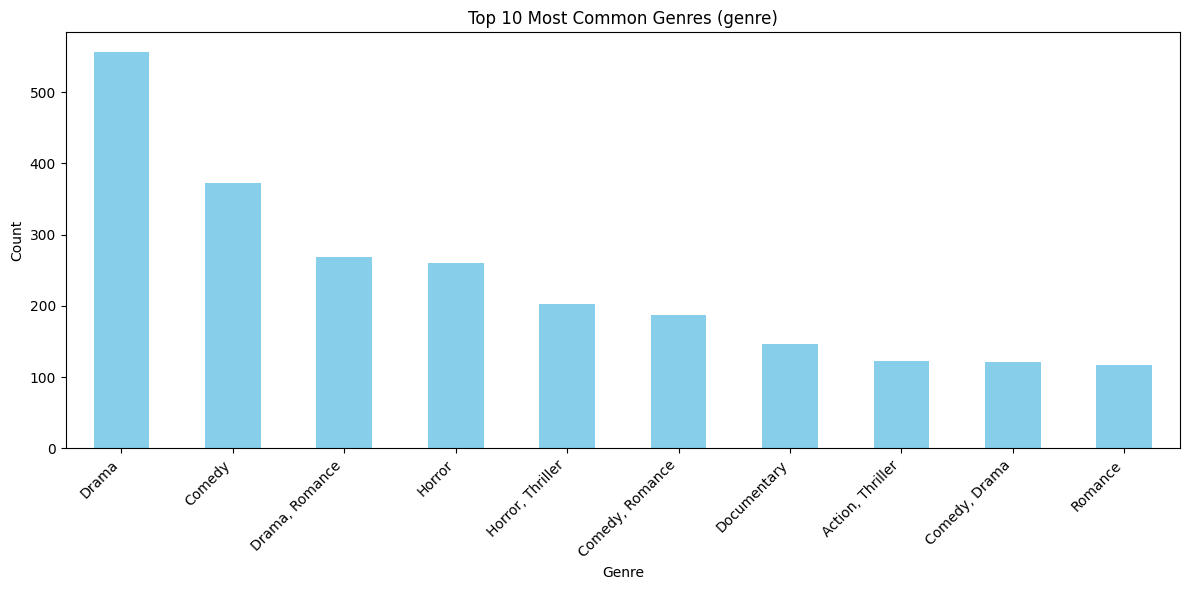

In [18]:
%matplotlib inline  

# =====================================
# 4. UNIVARIATE ANALYSIS (READABLE)
# =====================================

# --- Auto-detect runtime column ---
possible_runtime_cols = ['runtime', 'Runtime', 'duration', 'Duration', 'runtime_minutes']
runtime_col = next((col for col in possible_runtime_cols if col in df.columns), None)

if runtime_col:
    # Cap extreme runtimes at the 99th percentile to avoid long tail
    runtime_capped = df[runtime_col].clip(upper=df[runtime_col].quantile(0.99))

    plt.figure(figsize=(8,5))
    sns.histplot(runtime_capped.dropna(), bins=30, kde=True)
    plt.title(f'Distribution of Movie Runtime ({runtime_col}, capped at 99th percentile)')
    plt.xlabel('Runtime (minutes)')
    plt.tight_layout()
    plt.show()
else:
    print(" No runtime column found — skipping runtime plot.")

# --- Auto-detect genre column ---
possible_genre_cols = ['genre', 'Genre', 'genres']
genre_col = next((col for col in possible_genre_cols if col in df.columns), None)

if genre_col:
    # Show only top 10 genres
    top_n = 10
    genre_counts = df[genre_col].value_counts().head(top_n)

    plt.figure(figsize=(12,6))
    genre_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Most Common Genres ({genre_col})')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print(" No genre column found — skipping genre plot.")


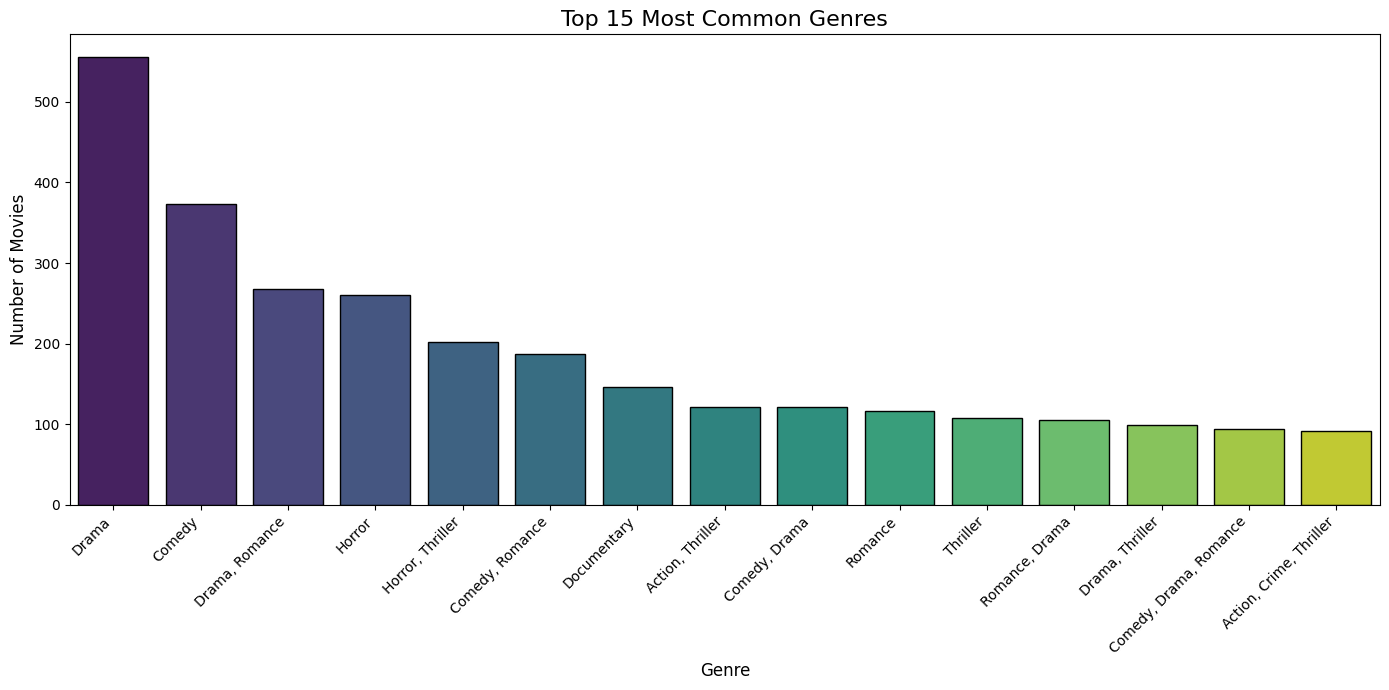

In [19]:
# Most common genres with improved readability
if 'genre' in df.columns:
    plt.figure(figsize=(14,7))

    # Show top 15 genres by count
    genre_counts = df['genre'].value_counts().head(15)

    sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette='viridis', edgecolor='black', legend=False)
    plt.title('Top 15 Most Common Genres', fontsize=16)
    plt.xlabel('Genre', fontsize=12)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No 'genre' column found.")


In [20]:
# =====================================
# 1. PROJECT SETUP & DATA LOADING
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully!")

# Path to your CSV file (update here)
DATA_PATH = "movies.csv"  # Change to your file path
df = pd.read_csv(DATA_PATH)

print("Dataset shape:", df.shape)
df.head()

Libraries loaded successfully!
Dataset shape: (10178, 12)


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


Skipping 'Runtime vs Rating': either 'runtime' or 'score' column not found in dataset.


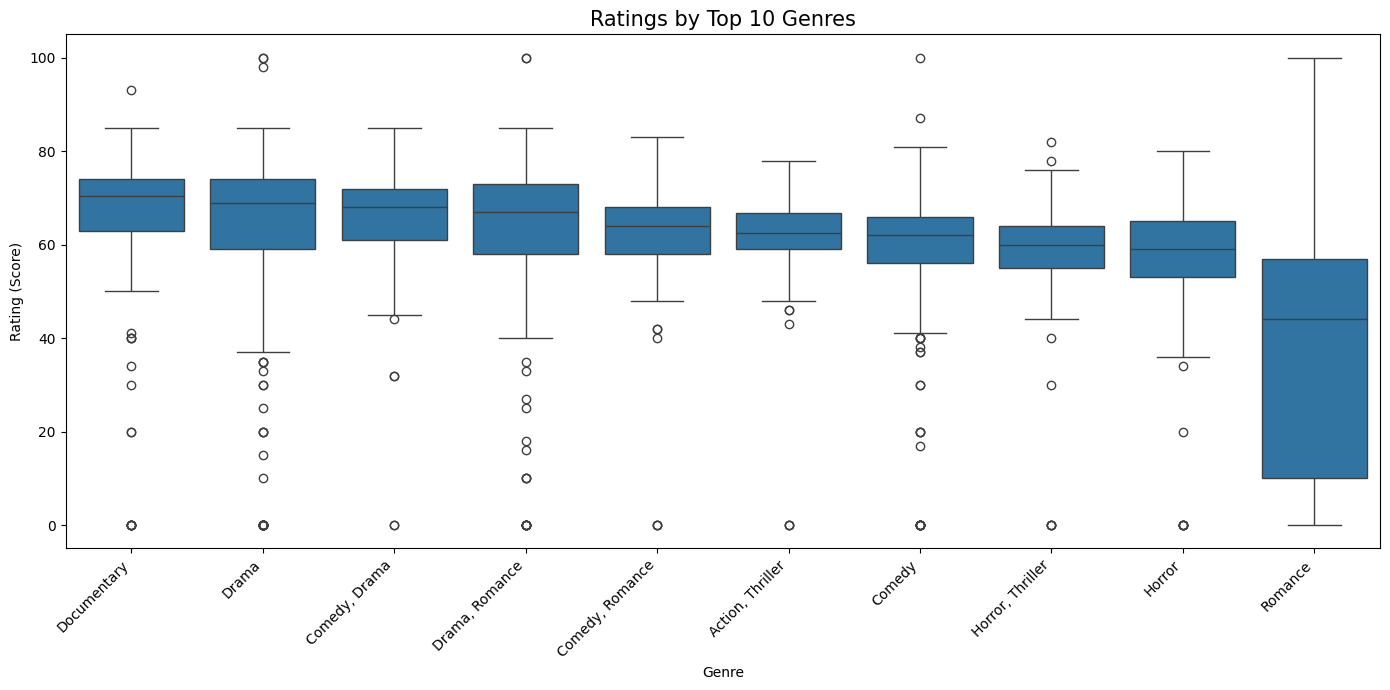

Skipping 'Votes vs Revenue': either 'votes' or 'revenue' column not found in dataset.


In [21]:
# =====================================
# 5. BIVARIATE ANALYSIS (TOP N + ERROR HANDLING)
# =====================================

import matplotlib.pyplot as plt
import seaborn as sns

# choose how many categories to display
top_n = 10

# 1️ Runtime vs Rating
if 'runtime' in df.columns and 'score' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='runtime', y='score', data=df, alpha=0.6)
    plt.title('Runtime vs Rating (Score)', fontsize=15)
    plt.xlabel('Runtime (minutes)')
    plt.ylabel('Rating (Score)')
    plt.tight_layout()
    plt.show()
else:
    print("Skipping 'Runtime vs Rating': either 'runtime' or 'score' column not found in dataset.")

# 2 Ratings by Genre (Boxplot with Top N Genres)
if 'genre' in df.columns and 'score' in df.columns:
    # take only top N genres by count
    top_genres = df['genre'].value_counts().head(top_n).index
    filtered_df = df[df['genre'].isin(top_genres)]

    plt.figure(figsize=(14,7))
    order = filtered_df.groupby('genre')['score'].median().sort_values(ascending=False).index
    sns.boxplot(x='genre', y='score', data=filtered_df, order=order)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Ratings by Top {top_n} Genres', fontsize=15)
    plt.xlabel('Genre')
    plt.ylabel('Rating (Score)')
    plt.tight_layout()
    plt.show()
else:
    print("Skipping 'Ratings by Genre': either 'genre' or 'score' column not found in dataset.")

# 3 Correlation between Votes & Revenue
if 'votes' in df.columns and 'revenue' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='votes', y='revenue', data=df, alpha=0.6)
    plt.title('Votes vs Revenue', fontsize=15)
    plt.xlabel('Votes')
    plt.ylabel('Revenue')
    plt.tight_layout()
    plt.show()

    # Calculate and print correlation coefficient
    corr_value = df[['votes','revenue']].corr().iloc[0,1]
    print(f"Correlation coefficient between Votes and Revenue: {corr_value:.2f}")
else:
    print("Skipping 'Votes vs Revenue': either 'votes' or 'revenue' column not found in dataset.")


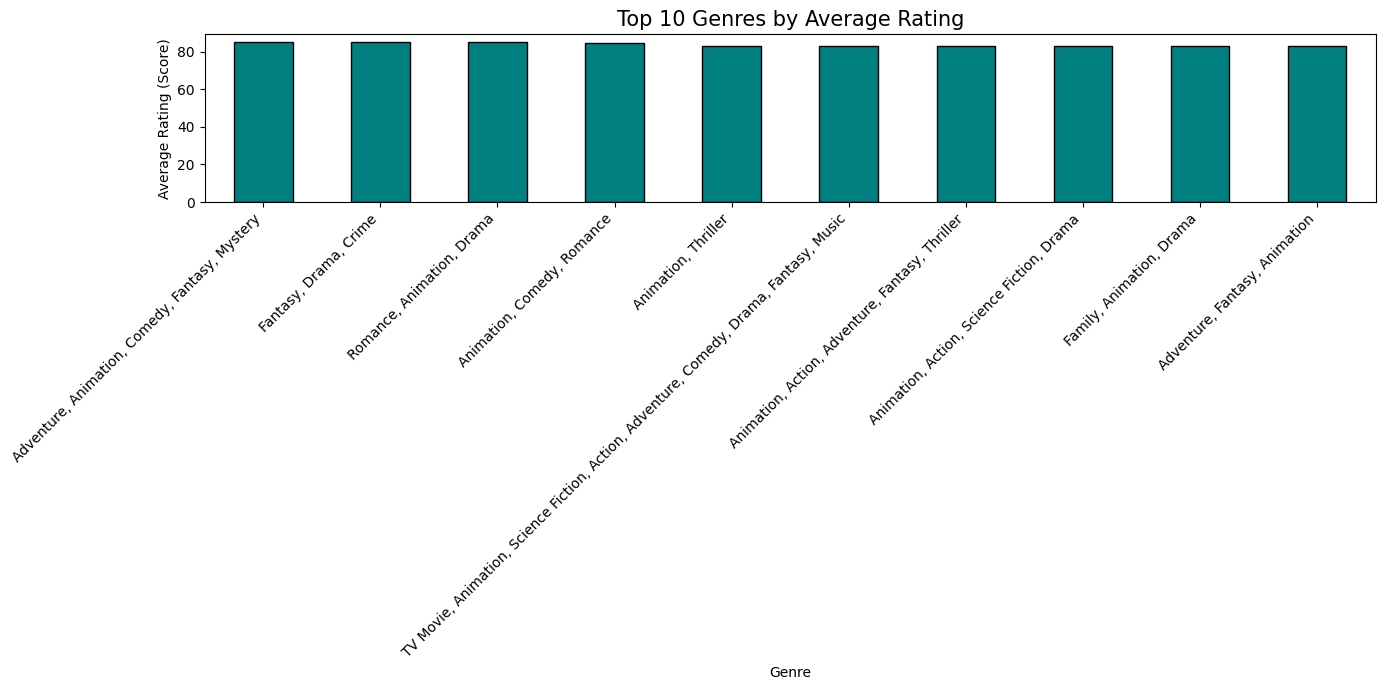

Highest average rating: Adventure, Animation, Comedy, Fantasy, Mystery (85.00)


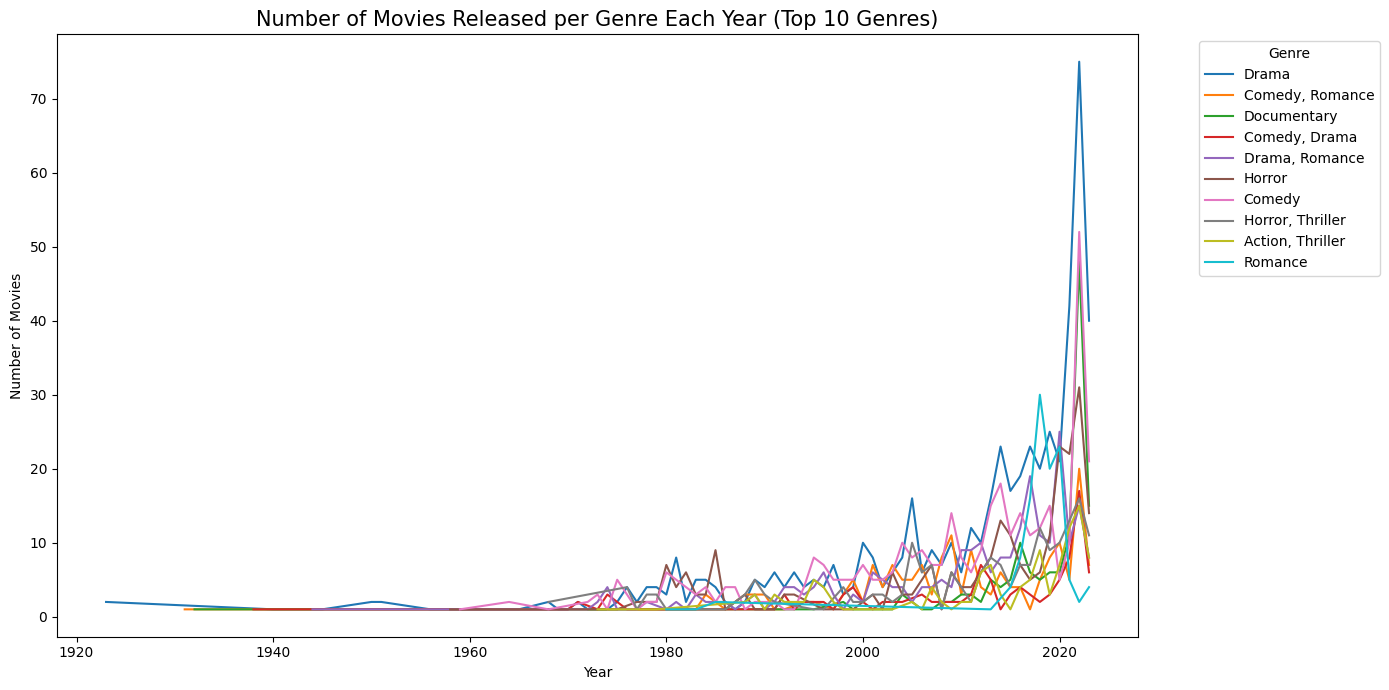

In [22]:
# =====================================
# 6. GENRE-SPECIFIC ANALYSIS (WITH ERROR HANDLING)
# =====================================

import matplotlib.pyplot as plt
import seaborn as sns

# choose how many genres to display in charts
top_n = 10  

# 1️ Which genre has the highest average rating?
if 'genre' in df.columns and 'score' in df.columns:
    avg_rating_by_genre = (
        df.groupby('genre')['score']
        .mean()
        .sort_values(ascending=False)
    )

    # Plot top N genres by average rating
    plt.figure(figsize=(14,7))
    avg_rating_by_genre.head(top_n).plot(kind='bar', color='teal', edgecolor='black')
    plt.title(f'Top {top_n} Genres by Average Rating', fontsize=15)
    plt.xlabel('Genre')
    plt.ylabel('Average Rating (Score)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Also print the highest-rated genre
    top_genre = avg_rating_by_genre.index[0]
    top_genre_score = avg_rating_by_genre.iloc[0]
    print(f"Highest average rating: {top_genre} ({top_genre_score:.2f})")
else:
    print("Skipping 'Average Rating by Genre': either 'genre' or 'score' column not found in dataset.")

# 2 How does the popularity of genres vary over time?
# We’ll look for a column representing the year; we’ll try common names:
possible_year_cols = ['year', 'release_year', 'date_x']  # add your date column here
year_col = next((col for col in possible_year_cols if col in df.columns), None)

if year_col and 'genre' in df.columns:
    # Extract year from date_x if it’s a datetime column
    if pd.api.types.is_datetime64_any_dtype(df[year_col]):
        df['year_only'] = df[year_col].dt.year
        year_use = 'year_only'
    else:
        # if column is string, try converting to datetime
        try:
            df['year_only'] = pd.to_datetime(df[year_col], errors='coerce').dt.year
            year_use = 'year_only'
        except:
            # if conversion fails, treat as already year integer
            year_use = year_col

    # Group by year and genre to count movies
    genre_trends = df.groupby([year_use, 'genre']).size().reset_index(name='count')

    # Filter only top N genres for readability
    top_genres = df['genre'].value_counts().head(top_n).index
    genre_trends = genre_trends[genre_trends['genre'].isin(top_genres)]

    # Plot popularity over time
    plt.figure(figsize=(14,7))
    sns.lineplot(data=genre_trends, x=year_use, y='count', hue='genre')
    plt.title(f'Number of Movies Released per Genre Each Year (Top {top_n} Genres)', fontsize=15)
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Skipping 'Popularity of Genres over Time': no suitable year or 'genre' column found.")


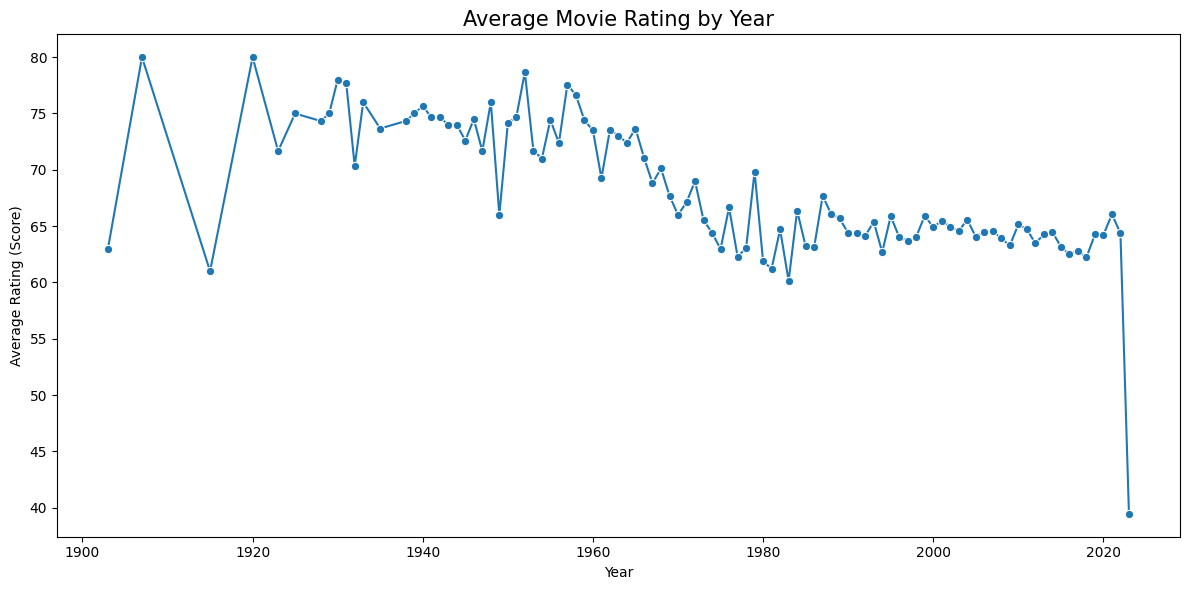

Highest average rating year: 1907 (80.00)
Lowest average rating year: 2023 (39.46)


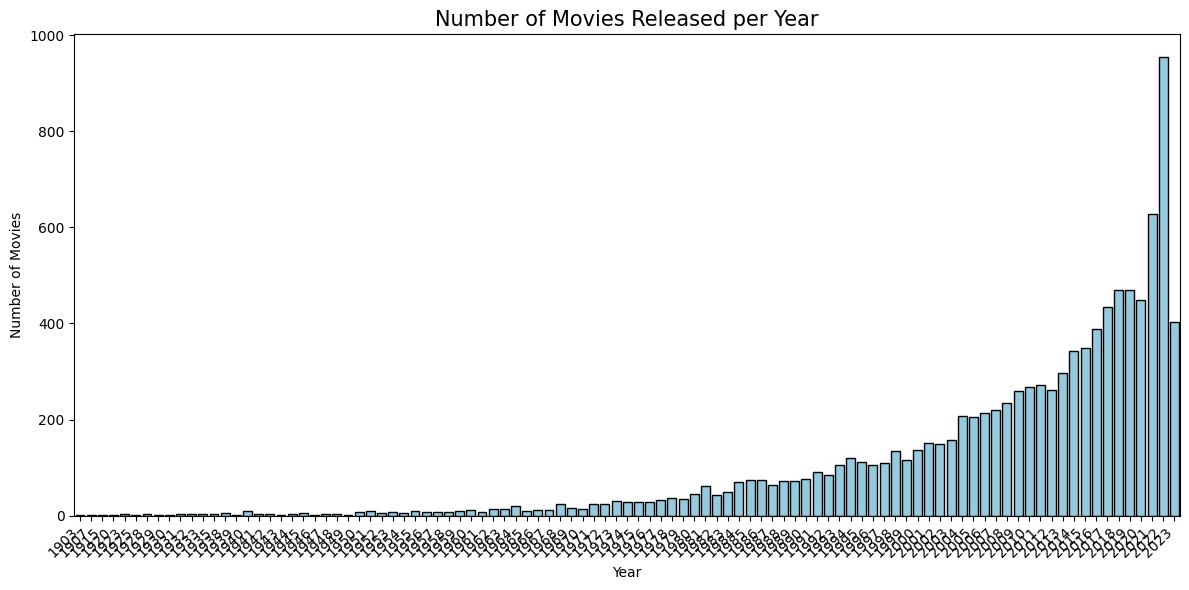

Year with most movie releases: 2022 (954 movies)
Year with least movie releases: 1903 (1 movies)


In [23]:
# =====================================
# 7. YEAR AND TREND ANALYSIS (WITH ERROR HANDLING)
# =====================================

import matplotlib.pyplot as plt
import seaborn as sns

# We’ll look for a column representing the year; we’ll try common names:
possible_year_cols = ['year', 'release_year', 'date_x']  # add/adjust as needed
year_col = next((col for col in possible_year_cols if col in df.columns), None)

# 1️ Average movie rating per year
if year_col and 'score' in df.columns:
    # Convert to year if datetime or string
    if pd.api.types.is_datetime64_any_dtype(df[year_col]):
        df['year_only'] = df[year_col].dt.year
        year_use = 'year_only'
    else:
        try:
            df['year_only'] = pd.to_datetime(df[year_col], errors='coerce').dt.year
            year_use = 'year_only'
        except:
            year_use = year_col

    avg_rating_by_year = (
        df.groupby(year_use)['score']
        .mean()
        .dropna()
        .reset_index()
        .sort_values(year_use)
    )

    plt.figure(figsize=(12,6))
    sns.lineplot(data=avg_rating_by_year, x=year_use, y='score', marker='o')
    plt.title('Average Movie Rating by Year', fontsize=15)
    plt.xlabel('Year')
    plt.ylabel('Average Rating (Score)')
    plt.tight_layout()
    plt.show()

    # Print best and worst average rating year
    best_year = avg_rating_by_year.loc[avg_rating_by_year['score'].idxmax(), year_use]
    best_score = avg_rating_by_year['score'].max()
    worst_year = avg_rating_by_year.loc[avg_rating_by_year['score'].idxmin(), year_use]
    worst_score = avg_rating_by_year['score'].min()
    print(f"Highest average rating year: {best_year} ({best_score:.2f})")
    print(f"Lowest average rating year: {worst_year} ({worst_score:.2f})")
else:
    print("Skipping 'Average Movie Rating by Year': no suitable year or 'score' column found.")

# 2️ Number of movies released per year
if year_col:
    movies_per_year = (
        df.groupby(year_use)
        .size()
        .reset_index(name='count')
        .sort_values(year_use)
    )

    plt.figure(figsize=(12,6))
    sns.barplot(data=movies_per_year, x=year_use, y='count', color='skyblue', edgecolor='black')
    plt.title('Number of Movies Released per Year', fontsize=15)
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Print year with max and min releases
    max_year = movies_per_year.loc[movies_per_year['count'].idxmax(), year_use]
    max_count = movies_per_year['count'].max()
    min_year = movies_per_year.loc[movies_per_year['count'].idxmin(), year_use]
    min_count = movies_per_year['count'].min()
    print(f"Year with most movie releases: {max_year} ({max_count} movies)")
    print(f"Year with least movie releases: {min_year} ({min_count} movies)")
else:
    print("Skipping 'Movies Released per Year': no suitable year column found.")


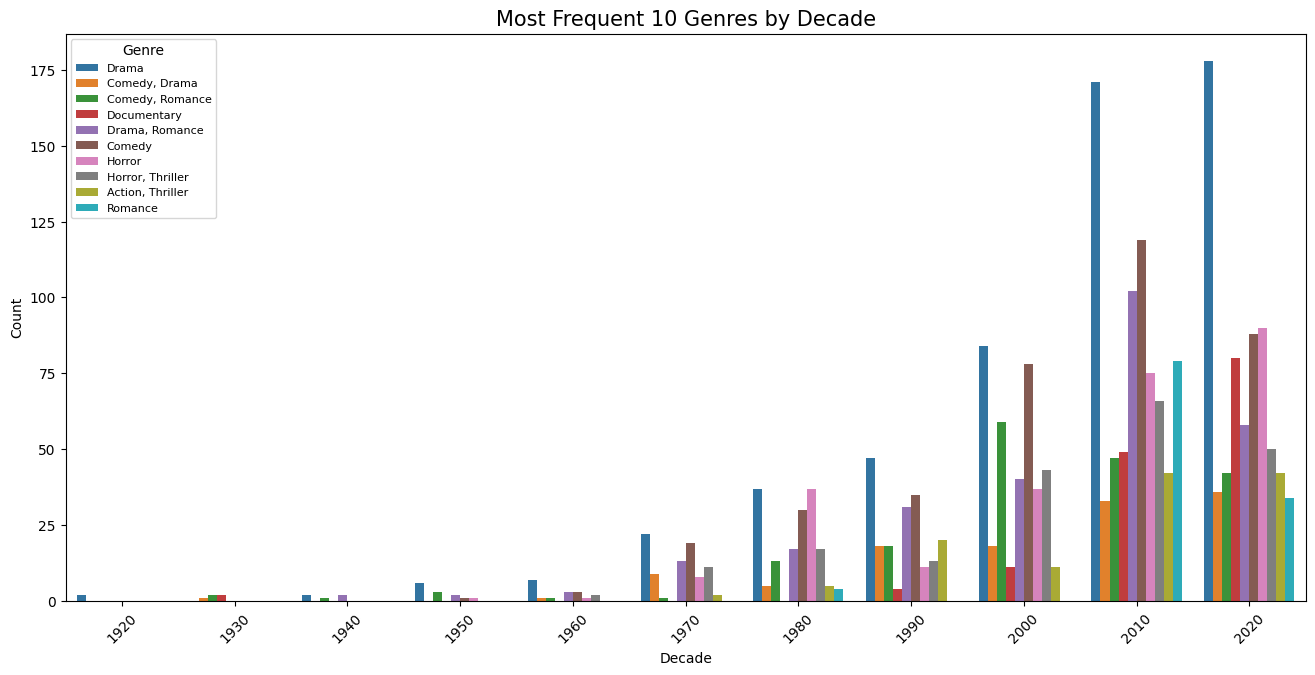

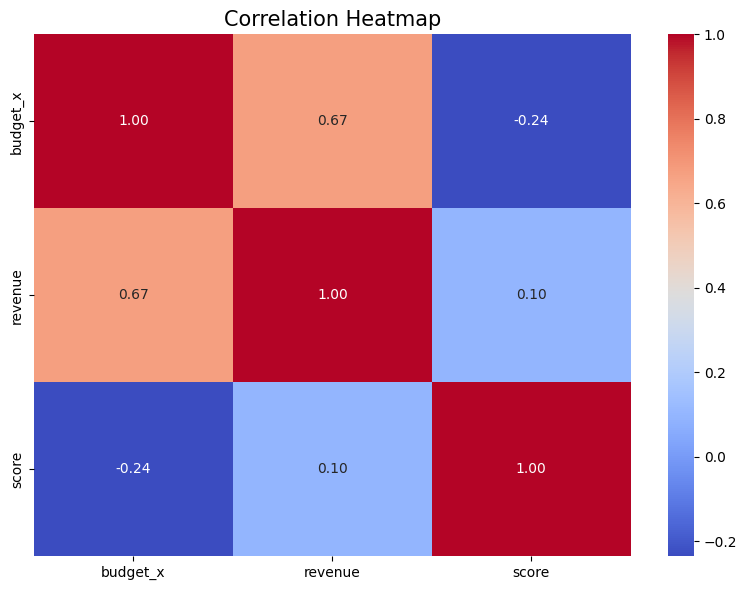

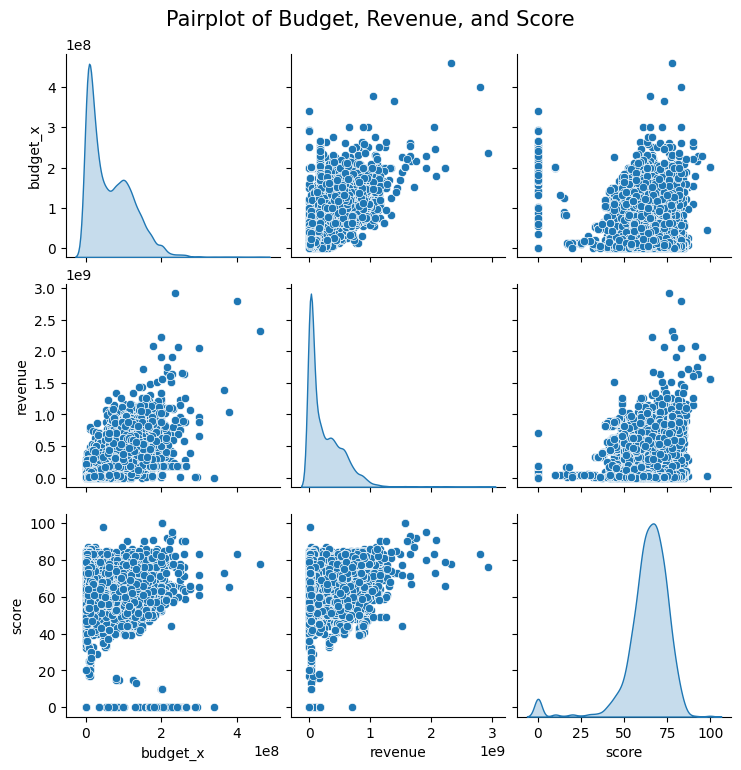

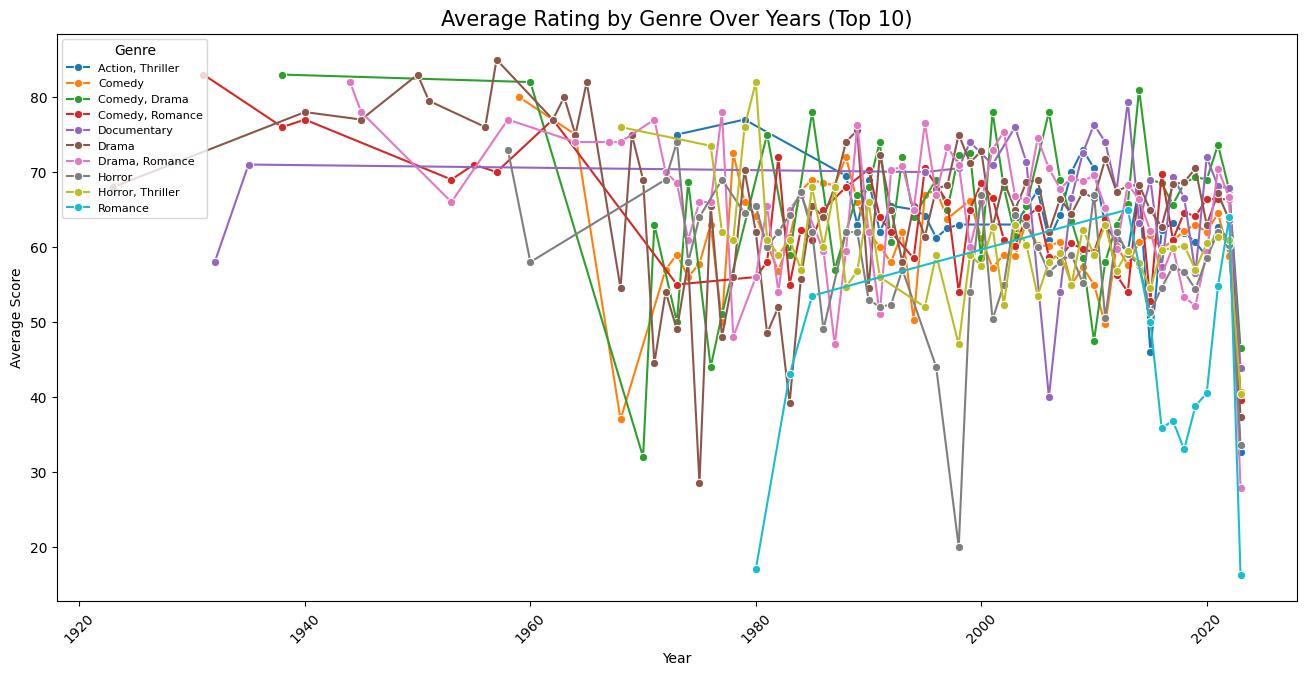

In [24]:
# =====================================
# 8. MULTIVARIATE ANALYSIS (OPTIMIZED WITH TOP-N GENRES)
# =====================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------
# PARAMETERS
# -----------------------------
TOP_N_GENRES = 10  # change this to show more or fewer genres

# -----------------------------
# 1 GENRES BY DECADE (TOP N)
# -----------------------------
possible_year_cols = ['year', 'release_year', 'date_x']
year_col = next((col for col in possible_year_cols if col in df.columns), None)

if year_col and 'genre' in df.columns:
    # Convert year column to numeric year
    if pd.api.types.is_datetime64_any_dtype(df[year_col]):
        df['year_only'] = df[year_col].dt.year
    else:
        df['year_only'] = pd.to_datetime(df[year_col], errors='coerce').dt.year

    df_valid = df.dropna(subset=['year_only'])

    # Take top N genres overall
    top_genres = df_valid['genre'].value_counts().head(TOP_N_GENRES).index
    df_valid = df_valid[df_valid['genre'].isin(top_genres)]

    # Create decade column
    df_valid['decade'] = (df_valid['year_only'] // 10) * 10

    # Group by decade and genre
    genre_decade = (
        df_valid.groupby(['decade', 'genre'])
        .size()
        .reset_index(name='count')
    )

    plt.figure(figsize=(16,9))
    sns.barplot(data=genre_decade, x='decade', y='count', hue='genre')
    plt.title(f'Most Frequent {TOP_N_GENRES} Genres by Decade', fontsize=15)
    plt.xlabel('Decade')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', fontsize=8, title='Genre')  # fixed legend
    plt.subplots_adjust(bottom=0.25)  # extra space at bottom
    plt.show()
else:
    print("Skipping 'Genres by Decade': Missing 'genre' or year column.")

# -----------------------------
# 2️ HEATMAP / PAIRPLOT
# -----------------------------
numeric_cols = [col for col in ['budget_x','revenue','score'] if col in df.columns]
if len(numeric_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap', fontsize=15)
    plt.tight_layout()
    plt.show()

    sns.pairplot(df[numeric_cols], diag_kind='kde')
    plt.suptitle('Pairplot of Budget, Revenue, and Score', y=1.02, fontsize=15)
    plt.show()
else:
    print("Skipping heatmap/pairplot: Need at least two of ['budget_x','revenue','score'].")

# -----------------------------
# 3️ AVERAGE RATING BY GENRE AND YEAR (TOP N)
# -----------------------------
if 'genre' in df.columns and year_col and 'score' in df.columns:
    df_avg = df[df['genre'].isin(top_genres)].copy()
    avg_rating_genre_year = (
        df_avg.groupby(['genre', 'year_only'])
        ['score']
        .mean()
        .reset_index()
        .dropna()
    )

    plt.figure(figsize=(16,9))
    sns.lineplot(data=avg_rating_genre_year, x='year_only', y='score', hue='genre', marker='o')
    plt.title(f'Average Rating by Genre Over Years (Top {TOP_N_GENRES})', fontsize=15)
    plt.xlabel('Year')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', fontsize=8, title='Genre')
    plt.subplots_adjust(bottom=0.25)
    plt.show()
else:
    print("Skipping 'Average Rating by Genre Over Years': Need 'genre', 'score', and year column.")


# =====================================
# 9. Insights and Summary
# =====================================

# [1] Movie Releases Trend

1.Over time, the number of movies released have grown significantly, meaning more films are being produced now than in past.
2.The highest number of movie releases happened in 2022, showing a peak in production.
3.The distribution of releases is right-skewed, which means earlier years had fewer releases, and the number has increased rapidly in recent decades.
4.This trend suggests that technological advancements, streaming platforms, and increased global interest in filmmaking have contributed to more movies being made.

# [2] Popular Genres & Ratings

1.Drama is the most common genre across all movies, followed by Action and Adventure.
2.However, even though Drama is the most frequent, movies in the Fantasy, Animation, and Comedy genres tend to receive higher IMDB ratings (85 on average).
3.This means that while Drama movies are made the most, audiences and critics rate Fantasy and Animation movies higher on average.
4.One possible reason is that animated and fantasy films often have better storytelling, visual appeal, and emotional impact, leading to higher ratings.

# [3] Budget vs Revenue

1.Movies with higher budget tend to earn more money at the box office.
2.The correlation is 0.67, which is a strong positive relationship, meaning that spending more on production usually results in higher revenue.
3.However, this isn’t a perfect correlation (1.0), meaning some low-budget films can still perform well, and some expensive films can fail.
4.Other factors like marketing, genre, and audience engagement also influence how much revenue a movie makes.

# [4] Trends Over Decades

1.In earlier decades, Drama was the most dominant genre, meaning most movies focused on serious storytelling and real-life themes.
2.In recent decades, Action, Sci-Fi, and Fantasy genres have gained popularity, likely due to advancement in CGI, special effects, and growing audience demand for visually engaging films.
3.When looking at the highest-rated movies, the mostly belong to the Fantasy, Animation, and Drama genres.
4.This suggests that people generally enjoy imaginative and visually stunning films, which receive better ratings compared to standard genres like Drama or Action.